#  *Importing python libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

#  *Discovering the dataset

In [2]:
data = pd.read_csv('UCI heart disease dataset/heart_disease_uci.csv')
data.shape

(920, 16)

In [3]:
data.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [4]:
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [7]:
data.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [8]:
# Seeing the dependent variable (target) i.e. how many people(patients) have heart disease or not  
data.num.value_counts()

0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64

#  *Looking up for missing data

In [9]:
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

<AxesSubplot:>

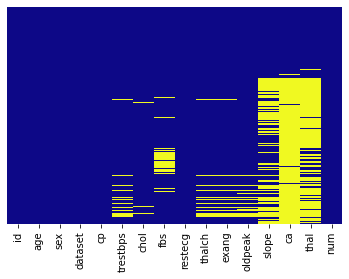

In [10]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='plasma')

#  *Handling missing data

In [11]:
data.dropna(inplace = True)

In [12]:
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,300,68,Male,Cleveland,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversable defect,2
300,301,57,Male,Cleveland,asymptomatic,130.0,131.0,False,normal,115.0,True,1.2,flat,1.0,reversable defect,3
301,302,57,Female,Cleveland,atypical angina,130.0,236.0,False,lv hypertrophy,174.0,False,0.0,flat,1.0,normal,1
508,509,47,Male,Hungary,asymptomatic,150.0,226.0,False,normal,98.0,True,1.5,flat,0.0,reversable defect,1


In [13]:
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,153.872910,54.521739,131.715719,246.785953,149.327759,1.058528,0.672241,0.946488
std,95.896287,9.030264,17.747751,52.532582,23.121062,1.162769,0.937438,1.230409
min,1.000000,29.000000,94.000000,100.000000,71.000000,0.000000,0.000000,0.000000
25%,75.500000,48.000000,120.000000,211.000000,132.500000,0.000000,0.000000,0.000000
50%,151.000000,56.000000,130.000000,242.000000,152.000000,0.800000,0.000000,0.000000
75%,227.500000,61.000000,140.000000,275.500000,165.500000,1.600000,1.000000,2.000000
max,749.000000,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000


c:\users\anirudh kaushal\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


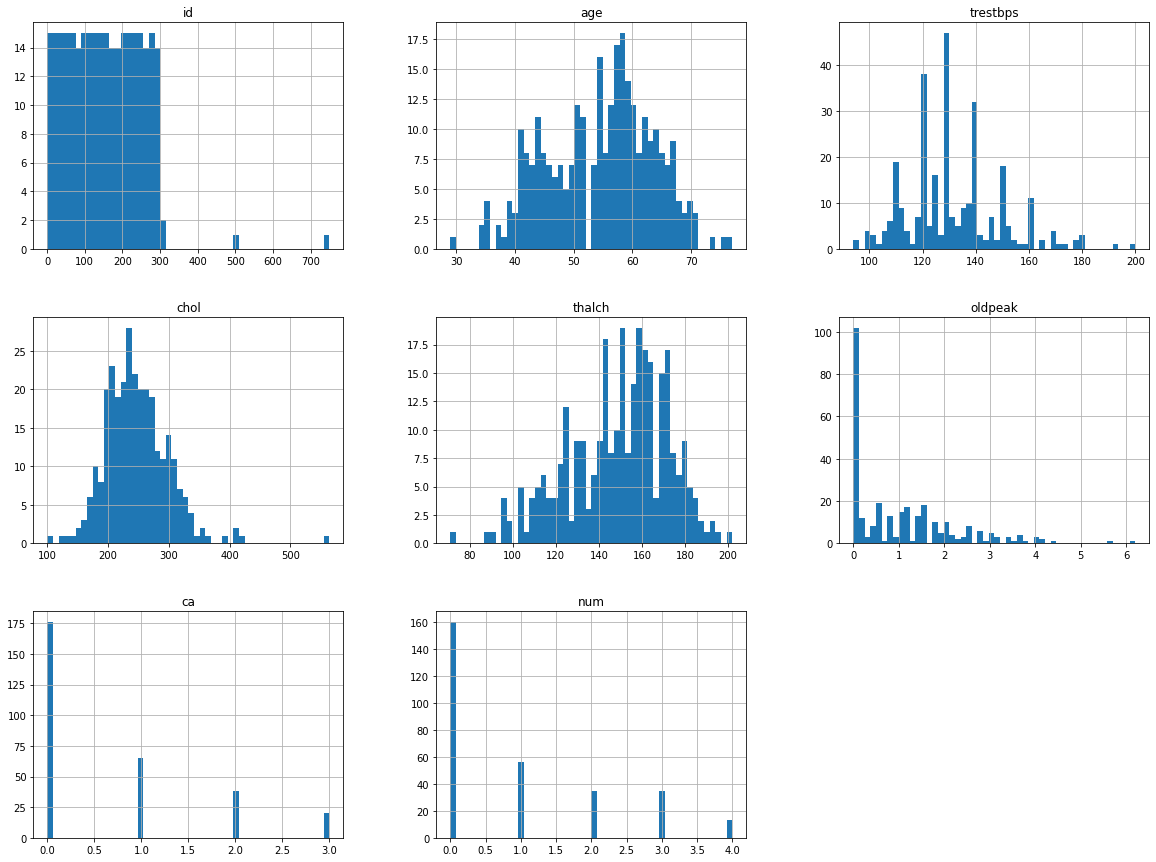

In [14]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [15]:
catdf=data[["sex","dataset","cp","restecg","exang","slope","thal","fbs"]]
catdf

,sex,dataset,cp,restecg,exang,slope,thal,fbs
0,Male,Cleveland,typical angina,lv hypertrophy,False,downsloping,fixed defect,True
1,Male,Cleveland,asymptomatic,lv hypertrophy,True,flat,normal,False
2,Male,Cleveland,asymptomatic,lv hypertrophy,True,flat,reversable defect,False
3,Male,Cleveland,non-anginal,normal,False,downsloping,normal,False
4,Female,Cleveland,atypical angina,lv hypertrophy,False,upsloping,normal,False
...,...,...,...,...,...,...,...,...
299,Male,Cleveland,asymptomatic,normal,False,flat,reversable defect,True
300,Male,Cleveland,asymptomatic,normal,True,flat,reversable defect,False
301,Female,Cleveland,atypical angina,lv hypertrophy,False,flat,normal,False
508,Male,Hungary,asymptomatic,normal,True,flat,reversable defect,False


In [16]:
data["sex"].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
print(data["dataset"].unique())
print(data["cp"].unique())
print(data["restecg"].unique())
print(data["exang"].unique())
print(data["slope"].unique())
print(data["thal"].unique())

['Cleveland' 'Hungary' 'VA Long Beach']
['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
['lv hypertrophy' 'normal' 'st-t abnormality']
[False True]
['downsloping' 'flat' 'upsloping']
['fixed defect' 'normal' 'reversable defect']


In [18]:
encoder = LabelEncoder()
encoder.fit(catdf["sex"])
gender = encoder.transform(catdf["sex"])
gender

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1])

In [19]:
encoder.fit(catdf["sex"])
encoder.fit(catdf["dataset"])
encoder.fit(catdf["cp"])
encoder.fit(catdf["restecg"])
encoder.fit(catdf["exang"])
encoder.fit(catdf["slope"])
encoder.fit(catdf["thal"])

LabelEncoder()

In [20]:
fbs = encoder.fit_transform(catdf["fbs"])
fbs

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [21]:
restingelectro = encoder.fit_transform(catdf["restecg"])
erercise = encoder.fit_transform(catdf["exang"])
peak = encoder.fit_transform(catdf["slope"])
defect = encoder.fit_transform(catdf["thal"])

In [22]:
df = pd.DataFrame()
df["age"] = data["age"]
df["trestbps"] = data["trestbps"]
df["cholestrol"] = data["chol"]
df["thalch"] = data["thalch"]
df["oldpeak"] = data["oldpeak"]
df["ca"] = data["ca"]

# Append columns to the Empty DataFrame
df['Gender'] = [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1]
df['Region'] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2]
df['cp'] = [3, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 1, 0, 2, 1, 3, 3,
       1, 2, 0, 2, 2, 3, 0, 0, 3, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 3, 1, 2,
       0, 2, 2, 0, 2, 2, 1, 0, 0, 1, 0, 0, 2, 0, 2, 3, 0, 2, 0, 2, 0, 0,
       2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1, 2, 2, 0,
       2, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 3, 0, 2, 2, 1, 0, 2, 0, 0, 0,
       0, 3, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 0, 3, 1, 0, 0, 1, 0, 2, 2, 1,
       0, 2, 1, 0, 1, 0, 2, 1, 3, 1, 2, 2, 2, 0, 2, 1, 2, 3, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 3, 3, 0, 1, 2, 1, 1, 2, 2, 0, 0, 2, 0, 3, 0, 1, 3, 0,
       0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 3, 2, 0, 0, 3, 1, 0, 0, 0, 2, 2, 2,
       0, 0, 1, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 3, 2,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 1, 2, 1, 3, 2, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 3, 3, 2, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 2,
       1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 0, 0]
df['restecg'] = [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1]
df['exang'] = [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1]
df["slope"] = [0, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2,
       1, 2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 1, 2, 1, 1,
       1, 2, 0, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 2, 2,
       2, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 2, 0, 2, 2, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 0, 1, 2, 0, 1,
       2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]
df["thal"] = [0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 0, 2, 1, 2, 2, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 2, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 2, 0,
       1, 1, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0,
       2, 1, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 0, 2, 1, 2,
       1, 0, 2, 1, 1, 0, 2, 2, 2, 2, 1, 2, 2]
df["fbs"]=[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
df["target"] = data["num"]

print("Dataframe Generated aftyer encoding ", df, sep='\n')

Dataframe Generated aftyer encoding 
     age  trestbps  cholestrol  thalch  oldpeak   ca  Gender  Region  cp  \
0     63     145.0       233.0   150.0      2.3  0.0       1       0   3   
1     67     160.0       286.0   108.0      1.5  3.0       1       0   0   
2     67     120.0       229.0   129.0      2.6  2.0       1       0   0   
3     37     130.0       250.0   187.0      3.5  0.0       1       0   2   
4     41     130.0       204.0   172.0      1.4  0.0       0       0   1   
..   ...       ...         ...     ...      ...  ...     ...     ...  ..   
299   68     144.0       193.0   141.0      3.4  2.0       1       0   0   
300   57     130.0       131.0   115.0      1.2  1.0       1       0   0   
301   57     130.0       236.0   174.0      0.0  1.0       0       0   1   
508   47     150.0       226.0    98.0      1.5  0.0       1       1   0   
748   56     120.0       100.0   120.0      1.5  0.0       1       2   0   

     restecg  exang  slope  thal  fbs  target  
0 

In [23]:
df.count()

age           299
trestbps      299
cholestrol    299
thalch        299
oldpeak       299
ca            299
Gender        299
Region        299
cp            299
restecg       299
exang         299
slope         299
thal          299
fbs           299
target        299
dtype: int64

c:\users\anirudh kaushal\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


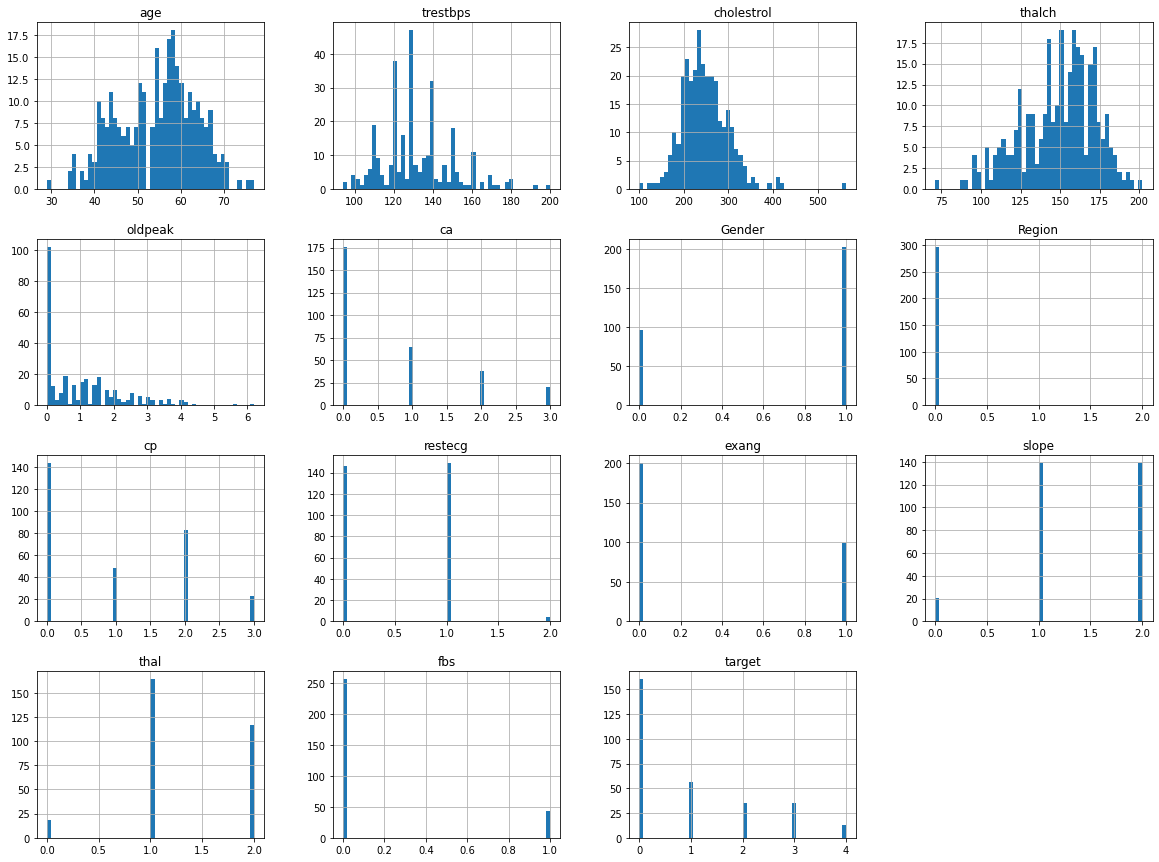

In [24]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [25]:
df.columns

Index(['age', 'trestbps', 'cholestrol', 'thalch', 'oldpeak', 'ca', 'Gender',
       'Region', 'cp', 'restecg', 'exang', 'slope', 'thal', 'fbs', 'target'],
      dtype='object')

In [26]:
df1=df.drop(["Region"],axis=1)
df1

,age,trestbps,cholestrol,thalch,oldpeak,ca,Gender,cp,restecg,exang,slope,thal,fbs,target
0,63,145.0,233.0,150.0,2.3,0.0,1,3,0,0,0,0,1,0
1,67,160.0,286.0,108.0,1.5,3.0,1,0,0,1,1,1,0,2
2,67,120.0,229.0,129.0,2.6,2.0,1,0,0,1,1,2,0,1
3,37,130.0,250.0,187.0,3.5,0.0,1,2,1,0,0,1,0,0
4,41,130.0,204.0,172.0,1.4,0.0,0,1,0,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,68,144.0,193.0,141.0,3.4,2.0,1,0,1,0,1,2,1,2
300,57,130.0,131.0,115.0,1.2,1.0,1,0,1,1,1,2,0,3
301,57,130.0,236.0,174.0,0.0,1.0,0,1,0,0,1,1,0,1
508,47,150.0,226.0,98.0,1.5,0.0,1,0,1,1,1,2,0,1


In [27]:
df1.describe()

,age,trestbps,cholestrol,thalch,oldpeak,ca,Gender,cp,restecg,exang,slope,thal,fbs,target
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.521739,131.715719,246.785953,149.327759,1.058528,0.672241,0.67893,0.949833,0.525084,0.331104,1.394649,1.331104,0.143813,0.946488
std,9.030264,17.747751,52.532582,23.121062,1.162769,0.937438,0.46767,1.033414,0.526358,0.471399,0.616962,0.585681,0.351488,1.230409
min,29.000000,94.000000,100.000000,71.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,132.500000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,56.000000,130.000000,242.000000,152.000000,0.800000,0.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,61.000000,140.000000,275.500000,165.500000,1.600000,1.000000,1.00000,2.000000,1.000000,1.000000,2.000000,2.000000,0.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,1.00000,3.000000,2.000000,1.000000,2.000000,2.000000,1.000000,4.000000


In [28]:
df1.target.value_counts()

0    160
1     56
2     35
3     35
4     13
Name: target, dtype: int64

In [29]:
df1["target"]=((df1["target"]>0)*1)
df1.target.value_counts()

0    160
1    139
Name: target, dtype: int64

Percentage of patients have not disease: 46.49%
Percentage of patients have disease: 53.51%


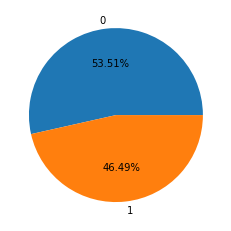

In [30]:
patients_havenot_disease=len(df1[df1.target==1])
patients_have_disease=len(df1[df1.target==0])
output=df1.target.value_counts().values
output_value=df1.target.value_counts().index                          
plt.pie(output,labels=output_value,autopct='%1.2f%%')
print("Percentage of patients have not disease: {:.2f}%".format((patients_havenot_disease/(len(df1.target))*100)))
print("Percentage of patients have disease: {:.2f}%".format((patients_have_disease/(len(df1.target))*100)))

After converting the num values into binary values, there were 53% patients have heart disease and 47% patients haven't.

In [31]:
df1

,age,trestbps,cholestrol,thalch,oldpeak,ca,Gender,cp,restecg,exang,slope,thal,fbs,target
0,63,145.0,233.0,150.0,2.3,0.0,1,3,0,0,0,0,1,0
1,67,160.0,286.0,108.0,1.5,3.0,1,0,0,1,1,1,0,1
2,67,120.0,229.0,129.0,2.6,2.0,1,0,0,1,1,2,0,1
3,37,130.0,250.0,187.0,3.5,0.0,1,2,1,0,0,1,0,0
4,41,130.0,204.0,172.0,1.4,0.0,0,1,0,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,68,144.0,193.0,141.0,3.4,2.0,1,0,1,0,1,2,1,1
300,57,130.0,131.0,115.0,1.2,1.0,1,0,1,1,1,2,0,1
301,57,130.0,236.0,174.0,0.0,1.0,0,1,0,0,1,1,0,1
508,47,150.0,226.0,98.0,1.5,0.0,1,0,1,1,1,2,0,1


In [32]:
standardScaler = StandardScaler()
Scaling =["age","trestbps","cholestrol","thalch","oldpeak","ca","restecg","cp","slope","thal"]
df1[Scaling] = standardScaler.fit_transform(df1[Scaling])

In [33]:
df1

,age,trestbps,cholestrol,thalch,oldpeak,ca,Gender,cp,restecg,exang,slope,thal,fbs,target
0,0.940446,0.749760,-0.262867,0.029124,1.069475,-0.718306,1,1.987204,-0.999250,0,-2.264299,-2.276554,1,0
1,1.384143,1.596354,0.747722,-1.790447,0.380309,2.487269,1,-0.920662,-0.999250,1,-0.640737,-0.566279,0,1
2,1.384143,-0.661231,-0.339138,-0.880662,1.327912,1.418744,1,-0.920662,-0.999250,1,-0.640737,1.143997,0,1
3,-1.943588,-0.096835,0.061285,1.632079,2.103224,-0.718306,1,1.017915,0.903781,0,-2.264299,-0.566279,0,0
4,-1.499891,-0.096835,-0.815830,0.982232,0.294163,-0.718306,0,0.048627,-0.999250,0,0.982825,-0.566279,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,1.495068,0.693320,-1.025575,-0.360784,2.017078,1.418744,1,-0.920662,0.903781,0,-0.640737,1.143997,1,1
300,0.274900,-0.096835,-2.207774,-1.487186,0.121872,0.350219,1,-0.920662,0.903781,1,-0.640737,1.143997,0,1
301,0.274900,-0.096835,-0.205664,1.068878,-0.911877,0.350219,0,0.048627,-0.999250,0,-0.640737,-0.566279,0,1
508,-0.834344,1.031958,-0.396341,-2.223678,0.380309,-0.718306,1,-0.920662,0.903781,1,-0.640737,1.143997,0,1


In [34]:
B= df1["target"]
A=df1.drop(["target"],axis=1)

In [35]:
A

,age,trestbps,cholestrol,thalch,oldpeak,ca,Gender,cp,restecg,exang,slope,thal,fbs
0,0.940446,0.749760,-0.262867,0.029124,1.069475,-0.718306,1,1.987204,-0.999250,0,-2.264299,-2.276554,1
1,1.384143,1.596354,0.747722,-1.790447,0.380309,2.487269,1,-0.920662,-0.999250,1,-0.640737,-0.566279,0
2,1.384143,-0.661231,-0.339138,-0.880662,1.327912,1.418744,1,-0.920662,-0.999250,1,-0.640737,1.143997,0
3,-1.943588,-0.096835,0.061285,1.632079,2.103224,-0.718306,1,1.017915,0.903781,0,-2.264299,-0.566279,0
4,-1.499891,-0.096835,-0.815830,0.982232,0.294163,-0.718306,0,0.048627,-0.999250,0,0.982825,-0.566279,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,1.495068,0.693320,-1.025575,-0.360784,2.017078,1.418744,1,-0.920662,0.903781,0,-0.640737,1.143997,1
300,0.274900,-0.096835,-2.207774,-1.487186,0.121872,0.350219,1,-0.920662,0.903781,1,-0.640737,1.143997,0
301,0.274900,-0.096835,-0.205664,1.068878,-0.911877,0.350219,0,0.048627,-0.999250,0,-0.640737,-0.566279,0
508,-0.834344,1.031958,-0.396341,-2.223678,0.380309,-0.718306,1,-0.920662,0.903781,1,-0.640737,1.143997,0


In [36]:
B

0      0
1      1
2      1
3      0
4      0
      ..
299    1
300    1
301    1
508    1
748    1
Name: target, Length: 299, dtype: int32

# Train - test split

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(A, B, test_size=0.2, stratify=B,random_state=2)

In [38]:
print(A.shape, X_train.shape, X_test.shape)

(299, 13) (239, 13) (60, 13)


# Applying models to the data

# 1. Logistic Regression

In [39]:
first_model = LogisticRegression()
first_model.fit(X_train, Y_train)

LogisticRegression()

In [40]:
# accuracy on training data
X_train_prediction = first_model.predict(X_train)
LR_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', LR_data_accuracy)

Accuracy on Training data :  0.8870292887029289


In [41]:
# accuracy on test data
X_test_prediction = first_model.predict(X_test)
LRT_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', LRT_data_accuracy)

Accuracy on Test data :  0.8666666666666667


In [42]:
Y_pred = first_model.predict(X_test)

In [43]:
compare_df = pd.DataFrame({"Y_test": Y_test , "Y_pred":Y_pred} )
compare_df.head()

,Y_test,Y_pred
25,0,0
32,1,0
81,0,0
70,0,0
153,1,1


In [44]:
conf1 = confusion_matrix(Y_test, Y_pred)
conf1

array([[29,  3],
       [ 5, 23]], dtype=int64)

<AxesSubplot:>

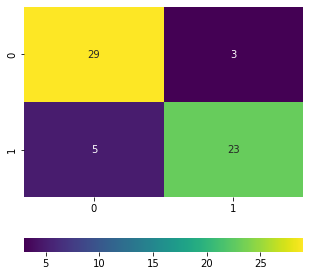

In [45]:
labels = first_model.classes_
plt.figure(figsize=(5,5))
ax = plt.subplot()
sns.heatmap(conf1, annot=True, ax=ax, fmt='d',cbar_kws={"orientation": "horizontal"},cmap="viridis")

# 2. K Nearest Neighbour

In [46]:
second_model = KNeighborsClassifier()
second_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [47]:
# accuracy on training data
X_train_prediction = second_model.predict(X_train)
KNC_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', KNC_data_accuracy)

Accuracy on Training data :  0.8619246861924686


In [48]:
# accuracy on test data
X_test_prediction = second_model.predict(X_test)
KNCT_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', KNCT_data_accuracy)

Accuracy on Test data :  0.75


In [49]:
Y_pred = second_model.predict(X_test)
conf2 = confusion_matrix(Y_test, Y_pred)
conf2

array([[25,  7],
       [ 8, 20]], dtype=int64)

<AxesSubplot:>

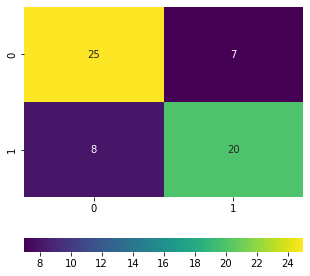

In [50]:
labels = second_model.classes_
plt.figure(figsize=(5,5))
ax = plt.subplot()
sns.heatmap(conf2, annot=True, ax=ax, fmt='d',cbar_kws={"orientation": "horizontal"},cmap="viridis")

# 3. RandomForest

In [51]:
third_model = RandomForestClassifier()
third_model.fit(X_train, Y_train)

RandomForestClassifier()

In [52]:
# accuracy on training data
X_train_prediction = third_model.predict(X_train)
RF_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', RF_data_accuracy)

Accuracy on Training data :  1.0


In [53]:
# accuracy on test data
X_test_prediction = third_model.predict(X_test)
RFT_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', RFT_data_accuracy)

Accuracy on Test data :  0.8


In [72]:
Y_pred = third_model.predict(X_test)
conf3 = confusion_matrix(Y_test, Y_pred)
conf3

array([[26,  6],
       [ 6, 22]], dtype=int64)

<AxesSubplot:>

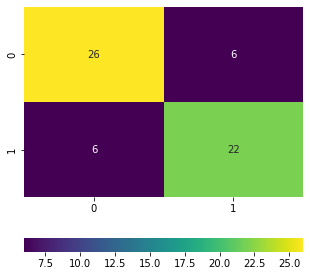

In [74]:
labels = third_model.classes_
plt.figure(figsize=(5,5))
ax = plt.subplot()
sns.heatmap(conf3, annot=True, ax=ax, fmt='d',cbar_kws={"orientation": "horizontal"},cmap="viridis")

# 4. Decision Tree

In [54]:
forth_model = DecisionTreeClassifier()
forth_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [55]:
# accuracy on training data
X_train_prediction = forth_model.predict(X_train)
DTC_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', DTC_data_accuracy)

Accuracy on Training data :  1.0


In [56]:
# accuracy on test data
X_test_prediction = forth_model.predict(X_test)
DTCT_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', DTCT_data_accuracy)

Accuracy on Test data :  0.6833333333333333


In [76]:
Y_pred = forth_model.predict(X_test)
conf4 = confusion_matrix(Y_test, Y_pred)
conf4

array([[22, 10],
       [ 9, 19]], dtype=int64)

<AxesSubplot:>

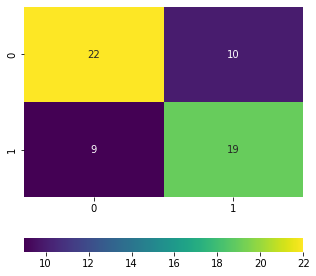

In [77]:
labels = forth_model.classes_
plt.figure(figsize=(5,5))
ax = plt.subplot()
sns.heatmap(conf4, annot=True, ax=ax, fmt='d',cbar_kws={"orientation": "horizontal"},cmap="viridis")

# 5.  Adaboost - Bagging Algorithm

In [57]:
fifth_model = AdaBoostClassifier()
fifth_model.fit(X_train, Y_train)

AdaBoostClassifier()

In [58]:
# accuracy on training data
X_train_prediction = fifth_model.predict(X_train)
ADB_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', ADB_data_accuracy)

Accuracy on Training data :  0.9456066945606695


In [59]:
# accuracy on test data
X_test_prediction = fifth_model.predict(X_test)
ADBT_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', ADBT_data_accuracy)

Accuracy on Test data :  0.7833333333333333


In [78]:
Y_pred = fifth_model.predict(X_test)
conf5 = confusion_matrix(Y_test, Y_pred)
conf5

array([[24,  8],
       [ 5, 23]], dtype=int64)

<AxesSubplot:>

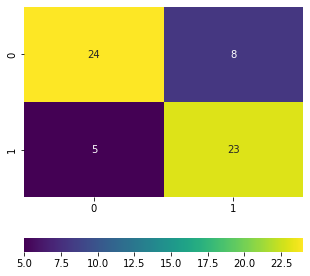

In [79]:
labels = fifth_model.classes_
plt.figure(figsize=(5,5))
ax = plt.subplot()
sns.heatmap(conf5, annot=True, ax=ax, fmt='d',cbar_kws={"orientation": "horizontal"},cmap="viridis")

#  6. XGBoost

In [60]:
sixth_model = XGBClassifier(base_score=0.7)
sixth_model.fit(X_train, Y_train)

c:\users\anirudh kaushal\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:25:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.7, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
# accuracy on training data
X_train_prediction = sixth_model.predict(X_train)
XGB_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', XGB_data_accuracy)


Accuracy on Training data :  1.0


In [62]:
# accuracy on test data
X_test_prediction = sixth_model.predict(X_test)
XGBT_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', XGBT_data_accuracy)

Accuracy on Test data :  0.75


In [80]:
Y_pred = sixth_model.predict(X_test)
conf6 = confusion_matrix(Y_test, Y_pred)
conf6

array([[25,  7],
       [ 8, 20]], dtype=int64)

<AxesSubplot:>

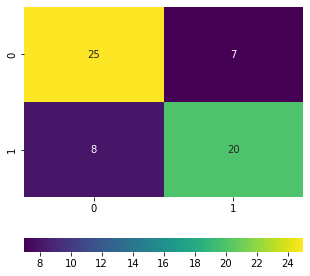

In [81]:
labels = sixth_model.classes_
plt.figure(figsize=(5,5))
ax = plt.subplot()
sns.heatmap(conf6, annot=True, ax=ax, fmt='d',cbar_kws={"orientation": "horizontal"},cmap="viridis")

In [82]:
#Check the accuracy of training dataset of all the models 
Accuracy_of_models = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Decision Tree', 'Random Forest','AdaBoost','XGBClassifier'], 
                        'Accuracy of training data': [LR_data_accuracy*100, KNC_data_accuracy*100, RF_data_accuracy*100, RF_data_accuracy*100, ADB_data_accuracy*100, XGB_data_accuracy*100]})
Accuracy_of_models.sort_values(by='Accuracy of training data', ascending=False,ignore_index=True)


,Model,Accuracy of training data
0,Decision Tree,100.000000
1,Random Forest,100.000000
2,XGBClassifier,100.000000
3,AdaBoost,94.560669
4,Logistic Regression,88.702929
5,K-Nearest Neighbour,86.192469


In [83]:
#Check the accoracy of test dataset of all the models
Accuracy_of_Testmodels=pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Decision Tree', 'Random Forest','AdaBoost','XGBClassifier'], 
                        'Accuracy_of_test_data': [LRT_data_accuracy*100, KNCT_data_accuracy*100, DTCT_data_accuracy*100, RFT_data_accuracy*100, ADBT_data_accuracy*100, XGBT_data_accuracy*100]})
Accuracy_of_Testmodels.sort_values(by='Accuracy_of_test_data', ascending=False,ignore_index=True)


,Model,Accuracy_of_test_data
0,Logistic Regression,86.666667
1,Random Forest,80.000000
2,AdaBoost,78.333333
3,K-Nearest Neighbour,75.000000
4,XGBClassifier,75.000000
5,Decision Tree,68.333333


## Dumping the models into pickle files

In [65]:
import pickle

In [66]:
pickle.dump(first_model, open('logistic_model.pkl', 'wb'))

In [67]:
pickle.dump(second_model, open('knn_model.pkl', 'wb'))

In [68]:
pickle.dump(third_model, open('randomforest_model.pkl', 'wb'))

In [69]:
pickle.dump(forth_model, open('decisiontree_model.pkl', 'wb'))

In [70]:
pickle.dump(fifth_model, open('adaboost_model.pkl', 'wb'))

In [71]:
pickle.dump(sixth_model, open('xgboost_model.pkl', 'wb'))